In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from darts import TimeSeries
from darts.models.forecasting.baselines import NaiveDrift
from darts.metrics import mape

/home/leo/.pyenv/versions/3.8.12/envs/carbon-forecast/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("../raw_data/Historical_Emissions_simp.csv")
data

,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn)
0,42694,Erste Group Bank AG,2005,Financials,Banks,Banks,Diversified Banks,7.596054e+03,6814.325028,1.347260,1.208610,0.000000,5638.151346
1,42694,Erste Group Bank AG,2006,Financials,Banks,Banks,Diversified Banks,1.255250e+04,10906.081210,1.308070,1.136500,0.000000,9596.196598
2,42694,Erste Group Bank AG,2007,Financials,Banks,Banks,Diversified Banks,1.147618e+04,9656.932392,1.270021,1.068693,0.000000,9036.210000
3,42694,Erste Group Bank AG,2008,Financials,Banks,Banks,Diversified Banks,1.110495e+04,19302.583214,1.139229,1.980203,0.000000,9747.780000
4,42694,Erste Group Bank AG,2009,Financials,Banks,Banks,Diversified Banks,2.801873e+04,65432.344312,2.403201,5.612213,94.431432,11658.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131056,248219,Sylvamo Corporation,2020,Materials,Materials,Paper & Forest Products,Paper Products,1.790196e+06,319137.045000,594.947000,106.061000,0.000000,3009.000000
131057,248243,Apartment Income REIT Corp.,2020,Real Estate,Real Estate,Equity Real Estate Investment Trusts (REITs),Residential REITs,9.101170e+03,39930.108000,12.648000,55.493000,0.000000,719.556000
131058,248356,Cogelec SA,2020,Information Technology,Technology Hardware & Equipment,Communications Equipment,Communications Equipment,2.104051e+03,491.906000,45.660000,10.675000,0.000000,46.080508
131059,248357,Global Bioenergies SA,2020,Materials,Materials,Chemicals,Commodity Chemicals,1.874000e+01,4.989000,257.538000,68.556000,0.000000,0.072767


In [3]:
data["C-abs-1+2"] = data["Carbon-Scope 1 (tonnes CO2e)"] + data["Carbon-Scope 2 (tonnes CO2e)"]
data

,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn),C-abs-1+2
0,42694,Erste Group Bank AG,2005,Financials,Banks,Banks,Diversified Banks,7.596054e+03,6814.325028,1.347260,1.208610,0.000000,5638.151346,1.441038e+04
1,42694,Erste Group Bank AG,2006,Financials,Banks,Banks,Diversified Banks,1.255250e+04,10906.081210,1.308070,1.136500,0.000000,9596.196598,2.345858e+04
2,42694,Erste Group Bank AG,2007,Financials,Banks,Banks,Diversified Banks,1.147618e+04,9656.932392,1.270021,1.068693,0.000000,9036.210000,2.113311e+04
3,42694,Erste Group Bank AG,2008,Financials,Banks,Banks,Diversified Banks,1.110495e+04,19302.583214,1.139229,1.980203,0.000000,9747.780000,3.040754e+04
4,42694,Erste Group Bank AG,2009,Financials,Banks,Banks,Diversified Banks,2.801873e+04,65432.344312,2.403201,5.612213,94.431432,11658.920000,9.345108e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131056,248219,Sylvamo Corporation,2020,Materials,Materials,Paper & Forest Products,Paper Products,1.790196e+06,319137.045000,594.947000,106.061000,0.000000,3009.000000,2.109333e+06
131057,248243,Apartment Income REIT Corp.,2020,Real Estate,Real Estate,Equity Real Estate Investment Trusts (REITs),Residential REITs,9.101170e+03,39930.108000,12.648000,55.493000,0.000000,719.556000,4.903128e+04
131058,248356,Cogelec SA,2020,Information Technology,Technology Hardware & Equipment,Communications Equipment,Communications Equipment,2.104051e+03,491.906000,45.660000,10.675000,0.000000,46.080508,2.595957e+03
131059,248357,Global Bioenergies SA,2020,Materials,Materials,Chemicals,Commodity Chemicals,1.874000e+01,4.989000,257.538000,68.556000,0.000000,0.072767,2.372900e+01


In [4]:
oilgas = data[data["GICS Industry Name"] == "Oil, Gas & Consumable Fuels"]
oilgas

,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn),C-abs-1+2
210,42717,Woodside Energy Group Ltd,2007,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.643806e+06,8724.780000,468.018306,2.484087,100.0,3512.268000,1.652530e+06
211,42717,Woodside Energy Group Ltd,2008,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.979545e+06,8923.626481,480.180974,2.164616,100.0,4122.497845,1.988469e+06
212,42717,Woodside Energy Group Ltd,2009,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,2.516979e+06,8389.174554,643.075650,2.143393,100.0,3913.970000,2.525368e+06
213,42717,Woodside Energy Group Ltd,2010,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,2.258013e+06,22282.000000,538.519653,5.314095,100.0,4193.000000,2.280295e+06
214,42717,Woodside Energy Group Ltd,2011,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.888694e+06,18637.580078,393.314101,3.881212,100.0,4802.000000,1.907332e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130345,247294,Hindustan Oil Exploration Company Limited,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.202759e+04,1382.351000,421.942000,48.495000,0.0,28.505307,1.340994e+04
130410,247360,"JC Chemical Co., Ltd.",2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Refining & Marketing,5.104816e+04,7240.055000,224.955000,31.905000,0.0,226.925832,5.828821e+04
130565,247533,New Fortress Energy Inc.,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Refining & Marketing,9.678890e+05,46781.000000,2143.007000,103.578000,100.0,451.650000,1.014670e+06
130627,247608,Peninsula Energy Limited,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Coal & Consumable Fuels,6.553500e+02,1618.294000,107.823000,266.254000,0.0,6.078000,2.273644e+03


In [5]:
oilgas_17_20 = oilgas[(oilgas["Financial Year"] == 2017) | (oilgas["Financial Year"] == 2018) | (oilgas["Financial Year"] == 2019) | (oilgas["Financial Year"] == 2020)]
oilgas_17_20

,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn),C-abs-1+2
219,42717,Woodside Energy Group Ltd,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,9.170000e+06,1.000000e+04,2547.222,2.778,100.000,3600.000000,9.180000e+06
560,42752,China Petroleum & Chemical Corporation,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Integrated Oil & Gas,1.285800e+08,4.236000e+07,421.366,138.817,99.996,305150.221210,1.709400e+08
634,42759,PetroChina Company Limited,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Integrated Oil & Gas,1.275700e+08,3.987000e+07,455.271,142.288,100.000,280206.546344,1.674400e+08
1661,42862,Pharos Energy plc,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.147090e+05,6.700000e+01,849.696,0.496,100.000,135.000000,1.147760e+05
1967,42911,Tullow Oil plc,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,2.032027e+06,1.445165e+03,1455.502,1.035,100.000,1396.100000,2.033472e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130345,247294,Hindustan Oil Exploration Company Limited,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.202759e+04,1.382351e+03,421.942,48.495,0.000,28.505307,1.340994e+04
130410,247360,"JC Chemical Co., Ltd.",2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Refining & Marketing,5.104816e+04,7.240055e+03,224.955,31.905,0.000,226.925832,5.828821e+04
130565,247533,New Fortress Energy Inc.,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Refining & Marketing,9.678890e+05,4.678100e+04,2143.007,103.578,100.000,451.650000,1.014670e+06
130627,247608,Peninsula Energy Limited,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Coal & Consumable Fuels,6.553500e+02,1.618294e+03,107.823,266.254,0.000,6.078000,2.273644e+03


In [6]:
id_2017_2020 = pd.DataFrame(oilgas_17_20.TCUID.value_counts() == 4).reset_index()
valid_tcuid = id_2017_2020[id_2017_2020.TCUID == True].sort_values("index")
tucid_list = valid_tcuid["index"].to_list()
tucid_list

[43331,
 43396,
 43675,
 43729,
 43804,
 43818,
 43929,
 43972,
 44077,
 44182,
 44220,
 44288,
 44427,
 44518,
 45040,
 45129,
 45239,
 45785,
 46167,
 46190,
 46740,
 46791,
 46958,
 47319,
 47443,
 47506,
 47517,
 47524,
 47547,
 47566,
 47608,
 47616,
 47635,
 47733,
 47889,
 47999,
 48556,
 48652,
 48671,
 48676,
 48705,
 48738,
 48766,
 48769,
 48771,
 48810,
 48849,
 48896,
 48917,
 48954,
 48957,
 48968,
 48971,
 49024,
 49035,
 49103,
 49140,
 49158,
 49200,
 49271,
 49437,
 49480,
 49558,
 49582,
 49617,
 49640,
 49641,
 49654,
 49679,
 51406,
 51425,
 51438,
 51439,
 51507,
 51523,
 51625,
 51801,
 51820,
 51836,
 51887,
 51913,
 51982,
 52072,
 52084,
 52093,
 52208,
 52225,
 52266,
 52580,
 52582,
 52584,
 52587,
 52592,
 52672,
 52699,
 52735,
 52753,
 52777,
 52791,
 53139,
 53298,
 53382,
 53406,
 53530,
 53641,
 53663,
 54060,
 54092,
 54220,
 54232,
 54246,
 54260,
 54300,
 54346,
 54390,
 54400,
 54404,
 54630,
 54632,
 54637,
 54740,
 54790,
 54838,
 55726,
 55771,


In [7]:
len(tucid_list)

352

In [8]:
output = {}
for tucid in tucid_list:
    output[tucid] = (oilgas["TCUID"] == tucid).value_counts()[1]
output

{43331: 10,
 43396: 16,
 43675: 15,
 43729: 16,
 43804: 16,
 43818: 16,
 43929: 15,
 43972: 15,
 44077: 16,
 44182: 16,
 44220: 11,
 44288: 16,
 44427: 16,
 44518: 16,
 45040: 10,
 45129: 15,
 45239: 16,
 45785: 16,
 46167: 15,
 46190: 16,
 46740: 13,
 46791: 16,
 46958: 16,
 47319: 15,
 47443: 16,
 47506: 16,
 47517: 16,
 47524: 16,
 47547: 16,
 47566: 14,
 47608: 16,
 47616: 16,
 47635: 16,
 47733: 14,
 47889: 16,
 47999: 8,
 48556: 16,
 48652: 16,
 48671: 16,
 48676: 16,
 48705: 16,
 48738: 16,
 48766: 16,
 48769: 8,
 48771: 9,
 48810: 16,
 48849: 13,
 48896: 16,
 48917: 16,
 48954: 16,
 48957: 16,
 48968: 16,
 48971: 16,
 49024: 5,
 49035: 16,
 49103: 5,
 49140: 16,
 49158: 5,
 49200: 5,
 49271: 11,
 49437: 16,
 49480: 16,
 49558: 6,
 49582: 16,
 49617: 16,
 49640: 15,
 49641: 6,
 49654: 15,
 49679: 16,
 51406: 17,
 51425: 16,
 51438: 16,
 51439: 15,
 51507: 4,
 51523: 15,
 51625: 16,
 51801: 5,
 51820: 16,
 51836: 16,
 51887: 16,
 51913: 15,
 51982: 10,
 52072: 16,
 52084: 8,
 520

In [9]:
ten_yr_or_more = {k: v for k, v in output.items() if v >=10}
len(ten_yr_or_more)

139

In [74]:
only_since_2005 = {k: v for k, v in output.items() if v ==16}
len(only_since_2005)

70

In [54]:
oilgas_10plus = oilgas[oilgas["TCUID"].isin(ten_yr_or_more)]
oilgas_10plus = oilgas_10plus[["TCUID", "Company", "Financial Year", "C-abs-1+2"]]
oilgas_10plus = oilgas_10plus[(oilgas_10plus["Financial Year"] < 2021)]
oilgas_10plus

,TCUID,Company,Financial Year,C-abs-1+2
4844,43331,Capricorn Energy PLC,2005,8.994581e+04
4845,43331,Capricorn Energy PLC,2006,9.023225e+04
4846,43331,Capricorn Energy PLC,2007,2.203765e+05
4847,43331,Capricorn Energy PLC,2008,1.603855e+05
4848,43331,Capricorn Energy PLC,2009,1.920745e+05
...,...,...,...,...
93782,207420,Shaanxi Coal Industry Company Limited,2016,1.431861e+07
93783,207420,Shaanxi Coal Industry Company Limited,2017,2.256667e+07
93784,207420,Shaanxi Coal Industry Company Limited,2018,2.655458e+07
93785,207420,Shaanxi Coal Industry Company Limited,2019,2.896951e+07


In [66]:
tucid_since_2005 = oilgas_10plus[oilgas_10plus["Financial Year"] == 2005].TCUID.unique().tolist()
tucid_since_2005

[43331,
 43396,
 43675,
 43729,
 43804,
 43818,
 43972,
 44077,
 44182,
 44288,
 44427,
 44518,
 45129,
 45239,
 45785,
 46167,
 46190,
 46791,
 46958,
 47319,
 47443,
 47506,
 47517,
 47524,
 47547,
 47608,
 47616,
 47635,
 47889,
 48556,
 48652,
 48671,
 48676,
 48705,
 48738,
 48766,
 48810,
 48896,
 48917,
 48954,
 48957,
 48968,
 48971,
 49035,
 49140,
 49271,
 49437,
 49480,
 49582,
 49617,
 49640,
 49654,
 49679,
 51406,
 51425,
 51438,
 51625,
 51820,
 51836,
 51887,
 51982,
 52072,
 52093,
 52208,
 52225,
 52266,
 52584,
 52672,
 52699,
 53406,
 53530,
 54092,
 54246,
 54300,
 54400,
 54404,
 54632,
 54637,
 54790,
 55851,
 56561,
 67927,
 84103,
 84104,
 84171,
 84197,
 84245]

In [58]:
oilgas_in_yr = oilgas_10plus.groupby("Financial Year", as_index=False).agg({"TCUID": "count", "C-abs-1+2": ["mean", "sum"]} )

In [59]:
oilgas_in_yr.rename(columns={"TCUID":"No. of Companies"}, inplace=True)

In [60]:
oilgas_in_yr

Financial Year No. of Companies     C-abs-1+2              
                             count          mean           sum
0            2005               87  1.273364e+07  1.107826e+09
1            2006               94  1.250022e+07  1.175020e+09
2            2007              104  1.225698e+07  1.274726e+09
3            2008              103  1.227486e+07  1.264310e+09
4            2009              111  1.147833e+07  1.274094e+09
5            2010              122  1.175352e+07  1.433929e+09
6            2011              132  1.283968e+07  1.694837e+09
7            2012              133  1.282526e+07  1.705760e+09
8            2013              134  1.246664e+07  1.670530e+09
9            2014              134  1.326670e+07  1.777738e+09
10           2015              135  1.245688e+07  1.681679e+09
11           2016              134  1.359491e+07  1.821718e+09
12           2017              139  1.406845e+07  1.955515e+09
13           2018              139  1.448477e+07  2.013383e+09
14           2019              139  1.335832e+07  1.856807e+09
15           2020              139  1.220527e+07  1.696532e+09

In [89]:
cmp_since_2005 = {}
for tucid in tucid_since_2005:
    cmp_since_2005[tucid] = len(oilgas_10plus[oilgas_10plus["TCUID"].isin(tucid_since_2005)][oilgas_10plus["TCUID"] == tucid])
cmp_since_2005

/tmp/ipykernel_21425/1794261502.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmp_since_2005[tucid] = len(oilgas_10plus[oilgas_10plus["TCUID"].isin(tucid_since_2005)][oilgas_10plus["TCUID"] == tucid])


{43331: 10,
 43396: 16,
 43675: 15,
 43729: 16,
 43804: 16,
 43818: 16,
 43972: 15,
 44077: 16,
 44182: 16,
 44288: 16,
 44427: 16,
 44518: 16,
 45129: 15,
 45239: 16,
 45785: 16,
 46167: 15,
 46190: 16,
 46791: 16,
 46958: 16,
 47319: 15,
 47443: 16,
 47506: 16,
 47517: 16,
 47524: 16,
 47547: 16,
 47608: 16,
 47616: 16,
 47635: 16,
 47889: 16,
 48556: 16,
 48652: 16,
 48671: 16,
 48676: 16,
 48705: 16,
 48738: 16,
 48766: 16,
 48810: 16,
 48896: 16,
 48917: 16,
 48954: 16,
 48957: 16,
 48968: 16,
 48971: 16,
 49035: 16,
 49140: 16,
 49271: 11,
 49437: 16,
 49480: 16,
 49582: 16,
 49617: 16,
 49640: 15,
 49654: 15,
 49679: 16,
 51406: 16,
 51425: 16,
 51438: 16,
 51625: 16,
 51820: 16,
 51836: 16,
 51887: 16,
 51982: 10,
 52072: 16,
 52093: 16,
 52208: 16,
 52225: 15,
 52266: 16,
 52584: 16,
 52672: 16,
 52699: 10,
 53406: 16,
 53530: 16,
 54092: 16,
 54246: 16,
 54300: 16,
 54400: 16,
 54404: 16,
 54632: 10,
 54637: 16,
 54790: 13,
 55851: 12,
 56561: 16,
 67927: 16,
 84103: 16,
 841

In [94]:
cmp_all_these_yr = {k: v for k, v in cmp_since_2005.items() if v ==16}
cmp_all_these_yr

{43396: 16,
 43729: 16,
 43804: 16,
 43818: 16,
 44077: 16,
 44182: 16,
 44288: 16,
 44427: 16,
 44518: 16,
 45239: 16,
 45785: 16,
 46190: 16,
 46791: 16,
 46958: 16,
 47443: 16,
 47506: 16,
 47517: 16,
 47524: 16,
 47547: 16,
 47608: 16,
 47616: 16,
 47635: 16,
 47889: 16,
 48556: 16,
 48652: 16,
 48671: 16,
 48676: 16,
 48705: 16,
 48738: 16,
 48766: 16,
 48810: 16,
 48896: 16,
 48917: 16,
 48954: 16,
 48957: 16,
 48968: 16,
 48971: 16,
 49035: 16,
 49140: 16,
 49437: 16,
 49480: 16,
 49582: 16,
 49617: 16,
 49679: 16,
 51406: 16,
 51425: 16,
 51438: 16,
 51625: 16,
 51820: 16,
 51836: 16,
 51887: 16,
 52072: 16,
 52093: 16,
 52208: 16,
 52266: 16,
 52584: 16,
 52672: 16,
 53406: 16,
 53530: 16,
 54092: 16,
 54246: 16,
 54300: 16,
 54400: 16,
 54404: 16,
 54637: 16,
 56561: 16,
 67927: 16,
 84103: 16,
 84171: 16,
 84197: 16,
 84245: 16}

In [84]:
oilgas_since_2005_by_yr = oilgas_10plus[oilgas_10plus["TCUID"].isin(cmp_since_2005.keys())].groupby("Financial Year", as_index=False).agg({"TCUID": "count", "C-abs-1+2": ["mean", "sum"]})
oilgas_since_2005_by_yr.rename(columns={"TCUID":"No. of Companies"}, inplace=True)
oilgas_since_2005_by_yr

Financial Year No. of Companies     C-abs-1+2              
                             count          mean           sum
0            2005               87  1.273364e+07  1.107826e+09
1            2006               85  1.312004e+07  1.115204e+09
2            2007               86  1.367348e+07  1.175919e+09
3            2008               83  1.413911e+07  1.173546e+09
4            2009               82  1.428727e+07  1.171556e+09
5            2010               82  1.523518e+07  1.249285e+09
6            2011               80  1.684792e+07  1.347833e+09
7            2012               81  1.631347e+07  1.321391e+09
8            2013               82  1.670430e+07  1.369752e+09
9            2014               82  1.797421e+07  1.473885e+09
10           2015               83  1.666790e+07  1.383436e+09
11           2016               82  1.727404e+07  1.416471e+09
12           2017               87  1.778059e+07  1.546911e+09
13           2018               87  1.827777e+07  1.590166e+09
14           2019               87  1.659231e+07  1.443531e+09
15           2020               87  1.474243e+07  1.282591e+09

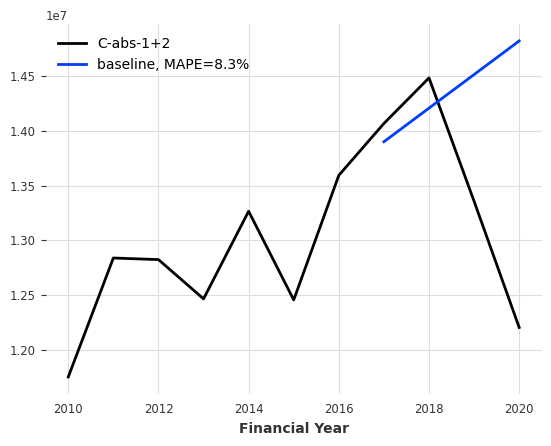

In [51]:
series = TimeSeries.from_dataframe(oilgas_in_yr, "Financial Year", "C-abs-1+2")
train, val = series[:-4], series[-4:]


model_base = NaiveDrift()
model_base.fit(train)
pred_base = model_base.predict(len(val))
err_base = mape(val, pred_base)
series.plot(new_plot=True)
pred_base.plot(label=f"baseline, MAPE={round(err_base,2)}%")

In [52]:
from darts.models import (
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT
)

In [53]:
model_aarima = AutoARIMA()
model_aarima.fit(train)
pred_aarima = model_aarima.predict(len(val))
err_aarima = mape(val, pred_aarima)
series.plot(new_plot=True)
pred_aarima.plot(label=f"AutoARIMA, MAPE={round(err_aarima,2)}%")

2022-09-06 16:05:29 main_logger ERROR: ValueError: Train series only contains 7 elements but Auto-ARIMA model requires at least 10 entries


ValueError: Train series only contains 7 elements but Auto-ARIMA model requires at least 10 entries

In [44]:
def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    error = mape(val, forecast)
    series.plot(new_plot=True)
    forecast.plot(label=f"{model}, MAPE={round(error,2)}%")
    


/home/leo/.pyenv/versions/3.8.12/envs/carbon-forecast/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


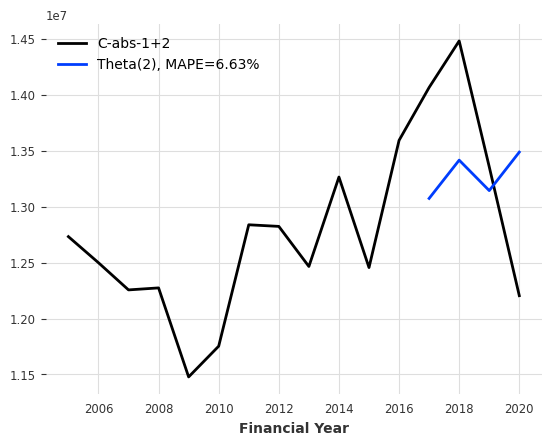

In [45]:
eval_model(Theta())